In [115]:
#3 Compute differing data distributions into visuals
import pandas as pd
import numpy as np

df = pd.read_csv("survey.csv")

school_year    Graduate Student  Junior  Senior  Sophomore
participation                                             
1                             0      21      12         11
2                             0      15       4          9
3                             0      27      14          8
4                             2      11       8          8
5                             2      16      10          8


<AxesSubplot:xlabel='participation'>

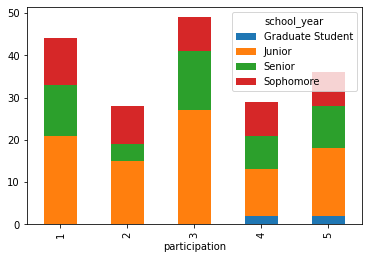

In [116]:

df1 = df
df1['school_year']= df.filter(items = ['What school year are you in?'])
df1['participation']= df.filter(items = ['What is your opinion on participation credit in your classes?'])
df1 = df.filter(items = ['school_year', 'participation'])

schoolYearVsParticipation = pd.crosstab(df1.participation, df1.school_year)
df1['school_year'].replace("Sophomore", 0, inplace = True)
df1['school_year'].replace("Junior", 1, inplace = True)
df1['school_year'].replace("Senior", 2, inplace = True)
df1['school_year'].replace("Graduate Student", 3, inplace = True)

print(schoolYearVsParticipation)
# schoolYearVsParticipation.plot()
schoolYearVsParticipation.plot.bar(stacked=True)


<AxesSubplot:xlabel='src', ylabel='gpa'>

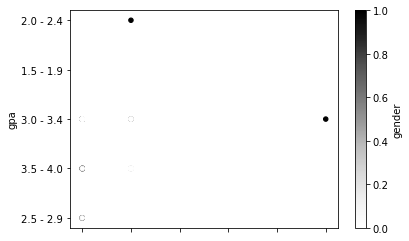

In [117]:
df2 = df

df2['src']= df2.filter(items = ['How many times a week do you visit the Student Recreation Center?'])
df2['gender']= df2.filter(items = ['What is your gender?'])
df2['gpa'] = df2.filter(items=['What is your current GPA?'])
df2['gender'].replace("Male", 0, inplace = True)
df2['gender'].replace("Female", 1, inplace = True)
df2 = df2.filter(items = ['src', 'gender', 'gpa'])



# df2
scatterPlot = df2.plot.scatter(x = 'src', y = 'gpa', c = 'gender', colormap = 'Spectral')
scatterPlot

In [118]:
df2 = df
df2['mental']= df2.filter(items = ['Do you think UCR has dedicated enough resources to student’s mental health?'])
df2['gender']= df2.filter(items = ['What is your gender?'])
df2 = df2.filter(items = ['mental', 'gender'])
SrcVsGender = pd.crosstab(df2.mental, df2.gender)
print(SrcVsGender)

gender  Female  Male
mental              
1            6     8
2            6    17
3           10    81
4            5    36
5            1    16
